In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Load the dataset
retaildf = pd.read_csv('/Users/snehakarki/Downloads/RetailProj/new_retail_data.csv')
retaildf

#302010 rows × 30 columns

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


- Will start by selecting those columns that are relevant to the project and problem scope. After that will handle null values, perform any encoding if reqd, datatype conversion.
- This will the be followed by more EDA - need for feature engineering, feature selection, standardization or normalization before diving deeper into model building and testing!
- eg: demograph_df = retaildf[['Age', 'Gender', 'Income','Transaction_ID','Customer_ID','Country', 'Customer_Segment', 'Total_Purchases', 'Amount','Total_Amount']]

demograph_df.head()

## Data Cleaning
1. Null Values
2. Erroneous Data
3. Data Type Conversion Required? 
4. Removing certain columns if reqd?

#### Coming back after first round of analysis - Look at it from a business point of view!

1. Do I need to do PCA or dimensionality reduction?
2. Feature Scaling?
3. Feature Engineering?

In [53]:
missing_percentage = (retaildf.isnull().sum()/len(retaildf))*100
missing_percentage

distinct_entries = retaildf.nunique().sort_values(ascending=False)
print(distinct_entries)

Address             299329
Total_Amount        299305
Amount              299297
Phone               299295
Transaction_ID      294461
Name                159390
Zipcode              93978
Customer_ID          86766
Time                 83677
Email                52897
Date                   366
products               318
City                   130
State                   54
Age                     53
Product_Type            33
Product_Brand           18
Month                   12
Total_Purchases         10
Product_Category         5
Ratings                  5
Country                  5
Payment_Method           4
Order_Status             4
Feedback                 4
Income                   3
Shipping_Method          3
Customer_Segment         3
Gender                   2
Year                     2
dtype: int64


 The percentage of missing values is very, very low compared to the total number of rows.
At this point it would be right to simply remove them

Columns thatshould be deletd - Transaction ID, 


In [55]:
columns_with_na = ['Address','Date','Total_Amount','Amount','Transaction_ID','Customer_ID','Name','Email','Phone','Zipcode']

retaildf.dropna(subset=columns_with_na, inplace=True)

#Importing the reqd library, pacakage for imputation
from sklearn.impute import SimpleImputer

#Imputing Columns 

# Fill NaN with 0 for 'Date'
retaildf['Date'].fillna('0', inplace=True)

# Impute based on related columns
# Impute 'Products' based on 'Product_Category'
# to fill missing values in the products column based on the most frequent products value within each Product_Category
retaildf['products'].fillna(retaildf.groupby('Product_Category')['products'].transform(lambda x: x.mode()[0]), inplace=True)

# Impute 'City' based on 'State'
retaildf['City'].fillna(retaildf.groupby('State')['City'].transform(lambda x: x.mode()[0]), inplace=True)

# Impute 'State' based on 'Country'
retaildf['State'].fillna(retaildf.groupby('Country')['State'].transform(lambda x: x.mode()[0]), inplace = True)

# Impute 'Product_Type' based on 'Product_Brand'
retaildf['Product_Type'].fillna(retaildf.groupby('Product_Brand')['Product_Type'].transform(lambda x: x.mode()[0]), inplace=True)

# Impute 'Product_Brand' based on 'Product_Type'
retaildf['Product_Brand'].fillna(retaildf.groupby('Product_Type')['Product_Brand'].transform(lambda x: x.mode()[0]), inplace=True)

#Imputer 'Month' based on 'Date' if it isn't null otherwise by the most popular month
popular_month = retaildf['Month'].mode()[0]
retaildf['Month'] = retaildf.apply(lambda row: row['Month'] if pd.notnull(row['Date']) else popular_month, axis=1)


#To impute non-numeric, categorical data from the rest of the columns ↓ 

numerical_columns = ['Age', 'Total_Purchases', 'Ratings']
mean_imputer = SimpleImputer(strategy='mean')
retaildf[numerical_columns] = mean_imputer.fit_transform(retaildf[numerical_columns])

# Impute categorical columns with mode
categorical_columns = ['Product_Category', 'Country', 'Payment_Method', 
                       'Order_Status', 'Feedback', 'Shipping_Method', 
                       'Customer_Segment', 'Gender', 'Income']

for col in categorical_columns:
    retaildf[col].fillna(retaildf[col].mode()[0], inplace=True)

new_missing_percentage = (retaildf.isnull().sum()/len(retaildf))*100
new_missing_percentage

Transaction_ID      0.000000
Customer_ID         0.000000
Name                0.000000
Email               0.000000
Phone               0.000000
Address             0.000000
City                0.000000
State               0.000000
Zipcode             0.000000
Country             0.000000
Age                 0.000000
Gender              0.000000
Income              0.000000
Customer_Segment    0.000000
Date                0.000000
Year                0.116553
Month               0.090429
Time                0.115883
Total_Purchases     0.000000
Amount              0.000000
Total_Amount        0.000000
Product_Category    0.000000
Product_Brand       0.000000
Product_Type        0.000000
Feedback            0.000000
Shipping_Method     0.000000
Payment_Method      0.000000
Order_Status        0.000000
Ratings             0.000000
products            0.000000
dtype: float64

We've handled the missing values fairly well, and whatever is still left we can drop it since it is a very small portion of the dataset.

In [56]:
'''state_mode = retaildf['State'].mode()[0]
retaildf['State'].fillna(state_mode, inplace=True)

income_mode = retaildf['Income'].mode()[0]
retaildf['Income'].fillna(income_mode, inplace=True)
''' 
year_mode = retaildf['Year'].mode()[0]
retaildf['Year'].fillna(year_mode, inplace=True)

time_mode = retaildf['Time'].mode()[0]
retaildf['Time'].fillna(time_mode, inplace=True)

month_mode = retaildf['Month'].mode()[0]
retaildf['Month'].fillna(month_mode, inplace=True)

retaildf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298577 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    298577 non-null  float64
 1   Customer_ID       298577 non-null  float64
 2   Name              298577 non-null  object 
 3   Email             298577 non-null  object 
 4   Phone             298577 non-null  float64
 5   Address           298577 non-null  object 
 6   City              298577 non-null  object 
 7   State             298577 non-null  object 
 8   Zipcode           298577 non-null  float64
 9   Country           298577 non-null  object 
 10  Age               298577 non-null  float64
 11  Gender            298577 non-null  object 
 12  Income            298577 non-null  object 
 13  Customer_Segment  298577 non-null  object 
 14  Date              298577 non-null  object 
 15  Year              298577 non-null  float64
 16  Month             29

In [57]:
import datetime

# List of columns to convert to int
columns_to_int = ['Transaction_ID', 'Customer_ID', 'Phone', 'Zipcode', 'Age', 'Total_Purchases', 'Ratings']

# Convert the columns to int
for column in columns_to_int:
    retaildf[column] = retaildf[column].astype(int)

retaildf['Total_Amount'] = retaildf['Total_Amount'].astype(float).round(2)
retaildf['Amount'] = retaildf['Amount'].astype(float).round(2)

#time related columns
retaildf['Year'] = retaildf['Year'].astype(int)
#retaildf['Month'] = retaildf['Month'].astype(int) - string values: Jan - Dec

retaildf['Date'] = pd.to_datetime(retaildf['Date'])
#retaildf['Time'] = pd.to_timedelta(retaildf['Time'])

# Display the first few rows to check the conversion
retaildf.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788,37249,Michelle Harrington,Ebony39@gmail.com,1414786801,3959 Amanda Burgs,Dortmund,Berlin,77985,Germany,...,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5,Cycling shorts
1,2174773,69749,Kelsey Hill,Mark36@gmail.com,6852899987,82072 Dawn Centers,Nottingham,England,99071,UK,...,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab
2,6679610,30192,Scott Jensen,Shane85@gmail.com,8362160449,4133 Young Canyon,Geelong,New South Wales,75929,Australia,...,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment
3,7232460,62101,Joseph Miller,Mary34@gmail.com,2776751724,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420,Canada,...,2466.85,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4,Utility knife
4,4983775,27901,Debra Coleman,Charles30@gmail.com,9098267635,5813 Lori Ports Suite 269,Bristol,England,48704,UK,...,248.55,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1,Chocolate cookies


#### Customer Segmentation and Behavior Analysis

Goal - To do a customer segmentation project - for a retail or clothing client ( a small startup who wants to enter the market )
I am starting with customer segmentation 
1. The other project did a clustering based on RFM Values (so we have clusters solely based on these scores)
2. Now for this project we have the RFM values already - so, I'm gonna focus on the datapoints for just USA! 
3. Then filter out the product category to just 'Clothing'
4. *After that I will have more interesting data features to work with or perform analysis on.*



In [20]:
retaildf_usa = retaildf[retaildf['Country'] == 'USA']
retaildf_usa

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
17800,7751454,44993,Geoffrey Simpson,Sherry51@gmail.com,9803128674,5432 Shah Brook,San Jose,Virginia,24427,USA,...,1450.94,Home Decor,IKEA,Furniture,Average,Express,PayPal,Delivered,2,Bed
17807,6957575,82566,Carolyn Perkins,Cynthia17@gmail.com,3011970438,87826 Adrian Port Apt. 736,Cleveland,Nevada,89413,USA,...,841.97,Electronics,Random House,Non-Fiction,Excellent,Standard,PayPal,Delivered,4,Psychology
17815,3615044,41633,Rebecca Aguilar,Brooke17@gmail.com,1014956621,452 Serrano Orchard Apt. 020,Philadelphia,Colorado,81641,USA,...,3463.25,Clothing,Nike,Shoes,Good,Same-Day,Cash,Delivered,3,Sneakers
17841,6553181,30794,Chad Palmer,Maria68@gmail.com,6460022898,4896 Cynthia Brook Suite 002,Atlanta,Arkansas,72702,USA,...,3064.76,Home Decor,Home Depot,Furniture,Excellent,Express,Cash,Delivered,4,Dresser
17844,4136859,51093,Douglas Gray,Traci81@gmail.com,7472706327,378 Daugherty Circles,New Orleans,Texas,78007,USA,...,1360.66,Clothing,Nike,Shoes,Good,Standard,Debit Card,Delivered,4,Loafers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301987,4957231,85053,Alexandra Brown,Leslie14@gmail.com,6962626489,82574 Morrow Parks,Omaha,Minnesota,55366,USA,...,1514.27,Grocery,Pepsi,Soft Drink,Good,Same-Day,Cash,Delivered,4,Lemon-lime soda
301989,2103093,26303,Joe Smith,Christina87@gmail.com,5004603041,636 Martin Mills,Dallas,Florida,32332,USA,...,1777.82,Books,Random House,Fiction,Average,Express,Cash,Shipped,2,Horror
301999,8032917,31242,Danielle Anderson,Todd67@gmail.com,3445479425,369 Barnes Tunnel,San Antonio,Florida,32598,USA,...,413.73,Electronics,Samsung,Tablet,Excellent,Same-Day,Cash,Shipped,5,iPad
302004,4833982,94117,Kara Hart,Tammy37@gmail.com,7108672468,872 Robinson Harbors Apt. 328,Charlotte,Missouri,65301,USA,...,2362.12,Clothing,Nike,Shorts,Excellent,Standard,Cash,Delivered,4,Chino shorts


In [58]:
#create a smaller subset of our dataset so we have lesser but only the most relevant columns to work with
demo_df_usa = retaildf_usa[['Date','Time','Total_Purchases','Amount','Total_Amount', 'Ratings','Transaction_ID','Customer_ID']].copy()
demo_df_usa.sample(10)

#combining the date and time column for calculating recency 
demo_df_usa['Datetime'] = demo_df_usa['Date'].astype(str) + ' ' + demo_df_usa['Time']

# Then convert to datetime
demo_df_usa['Datetime'] = pd.to_datetime(demo_df_usa['Datetime'], format='%Y-%m-%d %H:%M:%S')

In [62]:
#Monetary Score or High Value Customers
demo_df_usa['Total_Spending'] = demo_df_usa.groupby('Customer_ID')['Amount'].transform('sum')

def assign_monetary_score(amount):
    if amount <= 100:
        return 1
    elif amount <= 500:
        return 2
    elif amount <= 1000:
        return 3
    elif amount <= 5000:
        return 4
    else:
        return 5

demo_df_usa['Monetary_Score'] = demo_df_usa['Total_Spending'].apply(assign_monetary_score)

In [25]:
demo_df_usa.Monetary_Score.value_counts()

2    45524
3    33620
4     8651
1     6566
Name: Monetary_Score, dtype: int64

In [59]:
#Frequency Score
def assign_freq_score(purchase):
    if purchase == 1:
        return 1
    elif purchase in [2,3]:
        return 2
    elif purchase in [4,5]:
        return 3
    elif purchase in [6,7,8]:
        return 4
    else:
        return 5

#creating a new dataframe with the value counts for total purchases
frequency_df = demo_df_usa['Total_Purchases'].value_counts().reset_index()
frequency_df.columns = ['Total_Purchases', 'Count']

#sorting the dataframe by Total_Purchases
frequency_df = frequency_df.sort_values('Total_Purchases')

#cumulative percentages
frequency_df['Cumulative_Count'] = frequency_df['Count'].cumsum()
frequency_df['Cumulative_Percentage'] = frequency_df['Cumulative_Count'] / frequency_df['Count'].sum() * 100

#freq score
frequency_df['Frequency_Score'] = frequency_df['Total_Purchases'].apply(assign_freq_score)

#we merge the two dataframes: 
demo_df_usa = demo_df_usa.merge(frequency_df[['Total_Purchases', 'Frequency_Score']], 
                        on='Total_Purchases', 
                        how='left')
demo_df_usa.Frequency_Score.value_counts()

4    26450
3    20152
2    19923
5    17799
1    10037
Name: Frequency_Score, dtype: int64

In [60]:
#Recency : I need to add time and date together so i can get a decent recency score!
#let us first determine what would be a recent date based on what we have

most_recent_date = demo_df_usa['Datetime'].max()
most_recent_date #'2024-02-29 23:58:43'

demo_df_usa['Recency_Days'] = (most_recent_date - demo_df_usa['Datetime']).dt.days


#function to assign recency score
def assign_recency_score(days):
    if days <= 30:  # Within last month    this time range can be changed depending on the business need!
        return 5
    elif days <= 90:  # Within last 3 months
        return 4
    elif days <= 180:  # Within last 6 months
        return 3
    elif days <= 365:  # Within last year
        return 2
    else:  # More than a year ago
        return 1

demo_df_usa['Recency_Score'] = demo_df_usa['Recency_Days'].apply(assign_recency_score)
demo_df_usa.Recency_Score.value_counts()

2    47703
3    23194
4    15471
5     7993
Name: Recency_Score, dtype: int64

Recency_Score: 


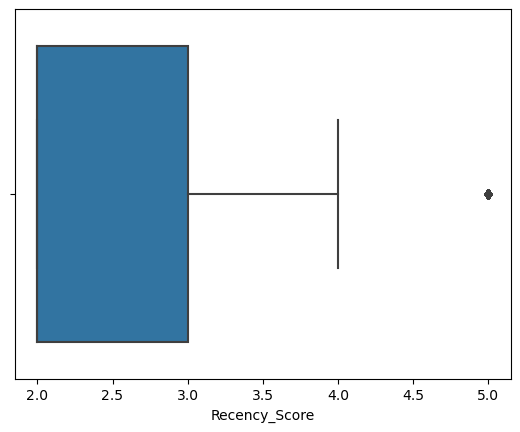

Frequency_Score: 


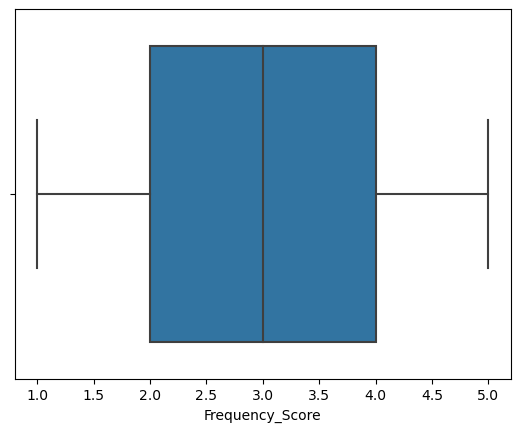

Monetary_Score: 


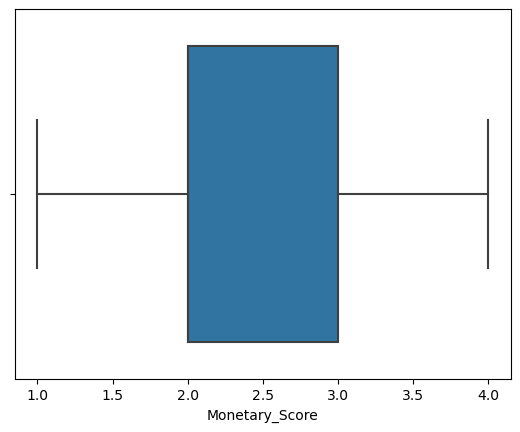

In [63]:
#now we have our final dataset with decent features to work with! 
#let's look for any outliers 
list1 = ['Recency_Score','Frequency_Score','Monetary_Score']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=demo_df_usa[str(i)])
    plt.show()

Recency_Score: 


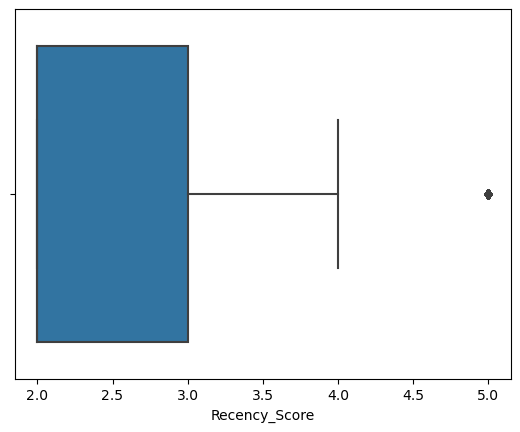

Frequency_Score: 


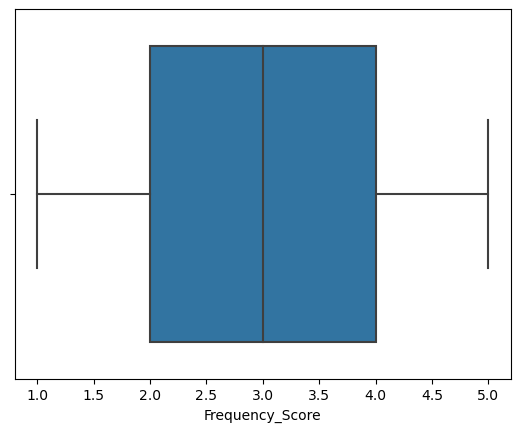

Monetary_Score: 


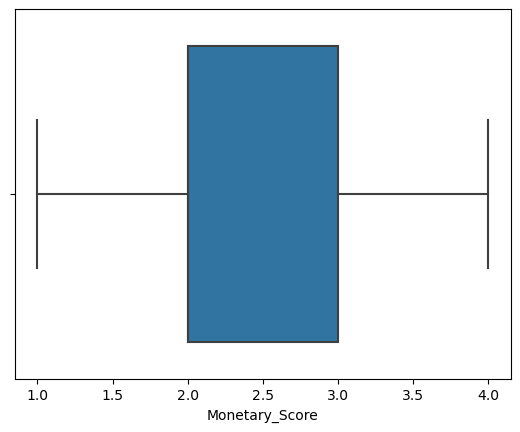

In [64]:
from scipy import stats
import numpy as np

def remove_outliers_zscore(df, columns, threshold=3): #to remove every datapoint with a score of less than 3
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        df = df[(z_scores < threshold)]
    return df

# Apply to your RFM columns
rfm_columns = ['Recency_Score', 'Frequency_Score', 'Monetary_Score']
demo_df_new = remove_outliers_zscore(demo_df_usa, rfm_columns)

#changes to the scores after removing outliers: 
list1 = ['Recency_Score','Frequency_Score','Monetary_Score']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=demo_df_new[str(i)])
    plt.show()

So, as we can see that the behaviour of customers - Customers in cluster 0 have high monetary and frequency score but a low recency score.

In [32]:
retaildf_usa.head()

#so For USA, we have 94361 data points which is a good starting point for our analysis
#we will filter the data to only include information where country = USA

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
17800,7751454,44993,Geoffrey Simpson,Sherry51@gmail.com,9803128674,5432 Shah Brook,San Jose,Virginia,24427,USA,...,1450.94,Home Decor,IKEA,Furniture,Average,Express,PayPal,Delivered,2,Bed
17807,6957575,82566,Carolyn Perkins,Cynthia17@gmail.com,3011970438,87826 Adrian Port Apt. 736,Cleveland,Nevada,89413,USA,...,841.97,Electronics,Random House,Non-Fiction,Excellent,Standard,PayPal,Delivered,4,Psychology
17815,3615044,41633,Rebecca Aguilar,Brooke17@gmail.com,1014956621,452 Serrano Orchard Apt. 020,Philadelphia,Colorado,81641,USA,...,3463.25,Clothing,Nike,Shoes,Good,Same-Day,Cash,Delivered,3,Sneakers
17841,6553181,30794,Chad Palmer,Maria68@gmail.com,6460022898,4896 Cynthia Brook Suite 002,Atlanta,Arkansas,72702,USA,...,3064.76,Home Decor,Home Depot,Furniture,Excellent,Express,Cash,Delivered,4,Dresser
17844,4136859,51093,Douglas Gray,Traci81@gmail.com,7472706327,378 Daugherty Circles,New Orleans,Texas,78007,USA,...,1360.66,Clothing,Nike,Shoes,Good,Standard,Debit Card,Delivered,4,Loafers


In [65]:
#Customer Segmentation by demographics
new_df = retaildf_usa[['Customer_ID','Transaction_ID','Product_Brand','Age','Gender','Income','Product_Category','Product_Type', 'products']].copy()
new_df.head()

demo_df_new.head()
cols_df1 = ['Total_Spending','Monetary_Score','Frequency_Score', 'Recency_Score']


brand_df_usa = pd.merge(new_df,
                     demo_df_new[['Transaction_ID', 'Customer_ID'] + cols_df1],
                     on=['Transaction_ID', 'Customer_ID'],
                     how='inner')
#let's do a join on customer_id or Transaction_ID
#get columns like recency score, monetary score, frequency score, total_spending!

brand_df_usa.sample(10)

,Customer_ID,Transaction_ID,Product_Brand,Age,Gender,Income,Product_Category,Product_Type,products,Total_Spending,Monetary_Score,Frequency_Score,Recency_Score
62967,63149,3151481,Pepsi,23,Male,High,Grocery,Juice,Grapefruit juice,600.72,3,2,2
76309,77132,9975135,IKEA,31,Male,Low,Home Decor,Lighting,Recessed lighting,816.96,3,1,5
68829,18964,7974951,Zara,49,Male,Medium,Clothing,Dress,Sundress,489.56,2,1,2
29859,98665,3611371,Pepsi,34,Female,Medium,Grocery,Water,Bottled water,341.96,2,5,3
41049,93243,4653923,Bed Bath & Beyond,26,Female,Medium,Home Decor,Bathroom,Shower curtain,153.95,2,4,2
895,59711,9819465,Home Depot,19,Male,Medium,Home Decor,Tools,Screwdriver set,206.56,2,2,2
42568,97685,1013043,Whirepool,26,Male,Low,Electronics,Fridge,Counter-depth refrigerator,474.85,2,5,3
51973,54499,2482503,Coca-Cola,26,Female,High,Grocery,Juice,Orange juice,738.19,3,3,2
34154,95118,9609159,Penguin Books,46,Female,High,Books,Children's,Books,742.06,3,4,5
42871,59130,2776900,Whirepool,26,Male,Low,Electronics,Fridge,Compact refrigerator,40.22,1,1,4


In [66]:
#Noticed some of the brands were placed under an incorrect category
category_brand_type =  brand_df_usa.groupby(['Product_Category', 'Product_Brand'])['Product_Type'].unique().reset_index()

# Display the results
print(category_brand_type)

# To get a count of product types for each category and brand
category_brand_type_count = brand_df_usa.groupby(['Product_Category', 'Product_Brand', 'Product_Type']).size().reset_index(name='Count')

print("\nDetailed view with counts:")
print(category_brand_type_count)
#adidas electronics!
# Electronics             Adidas                     [T-shirt, Jacket]
#Electronics               Nike                       [Shoes, Shorts]
#Electronics               Zara                 [Jeans, Shirt, Dress]

#there is mistake with the prodcut category under which these brands have been placed - so we need to correct this

   Product_Category      Product_Brand                          Product_Type
0             Books      HarperCollins      [Non-Fiction, Fiction, Thriller]
1             Books      Penguin Books    [Children's, Non-Fiction, Fiction]
2             Books       Random House    [Literature, Non-Fiction, Fiction]
3          Clothing             Adidas              [Jacket, Shoes, T-shirt]
4          Clothing               Nike              [Shoes, Shorts, T-shirt]
5          Clothing               Zara                 [Dress, Shirt, Jeans]
6       Electronics             Adidas                     [T-shirt, Jacket]
7       Electronics              Apple          [Smartphone, Tablet, Laptop]
8       Electronics  Bed Bath & Beyond          [Bedding, Bathroom, Kitchen]
9       Electronics           BlueStar                         [BlueStar AC]
10      Electronics          Coca-Cola            [Water, Soft Drink, Juice]
11      Electronics      HarperCollins      [Thriller, Non-Fiction, Fiction]

In [67]:
brand_category_map = {
    'Adidas': 'Clothing',
    'Nike': 'Clothing',
    'Zara': 'Clothing'
}

# Function to correct the category
def correct_category(row):
    if row['Product_Brand'] in brand_category_map:
        return brand_category_map[row['Product_Brand']]
    return row['Product_Category']

# Apply the correction
brand_df_usa['Corrected_Category'] = brand_df_usa.apply(correct_category, axis=1)

# Display the rows where corrections were made
corrections = brand_df_usa[brand_df_usa['Product_Category'] != brand_df_usa['Corrected_Category']]
print("Corrected categorizations:")
print(corrections[['Product_Category', 'Corrected_Category', 'Product_Brand', 'Product_Type']])

# Update the original Product_Category column
brand_df_usa['Product_Category'] = brand_df_usa['Corrected_Category']

# Remove the temporary Corrected_Category column
brand_df_usa = brand_df_usa.drop('Corrected_Category', axis=1)

# Verify the changes
print("\nUpdated categorizations:")
print(brand_df_usa[brand_df_usa['Product_Brand'].isin(['Adidas', 'Nike', 'Zara'])][['Product_Category', 'Product_Brand', 'Product_Type']])

# Count of corrected entries
corrected_count = len(corrections)
print(f"\nNumber of entries corrected: {corrected_count}")

Corrected categorizations:
      Product_Category Corrected_Category Product_Brand Product_Type
6445       Electronics           Clothing          Nike        Shoes
9472       Electronics           Clothing          Zara        Jeans
9742       Electronics           Clothing          Nike        Shoes
14800      Electronics           Clothing          Zara        Jeans
15977      Electronics           Clothing        Adidas      T-shirt
34390      Electronics           Clothing        Adidas       Jacket
34704      Electronics           Clothing          Zara        Shirt
35711      Electronics           Clothing        Adidas       Jacket
36121      Electronics           Clothing          Nike       Shorts
39110      Electronics           Clothing        Adidas      T-shirt
48189      Electronics           Clothing        Adidas       Jacket
54438      Electronics           Clothing          Nike       Shorts
58492      Electronics           Clothing          Nike       Shorts
68672  

## Basic Exploration

1. Unique Clothing Products under each category
2. Brands
3. Product Types

In [68]:

unique_clothing_products = brand_df_usa[brand_df_usa['Product_Category'] == 'Clothing']['products'].unique()

# Display the unique clothing products
print("Unique products in the Clothing category:")
for product in unique_clothing_products:
    print(f"- {product}")

Unique products in the Clothing category:
- Sneakers
- Loafers
- Fit and flare dress
- Cocktail dress
- Tank top
- Windbreaker
- Athletic shorts
- Leather jacket
- Oxfords
- Cycling shorts
- Denim jacket
- Slippers
- Maxi dress
- High heels
- Running shoes
- Flare jeans
- Crop top
- Bootcut jeans
- Low-rise jeans
- Flannel shirt
- Skinny jeans
- Henley shirt
- Skorts
- Boots
- Bomber jacket
- Graphic tee
- Henley tee
- Plain tee
- Crew neck tee
- Blouse
- Blazer
- Sheath dress
- Long-sleeve tee
- Sundress
- Khaki shorts
- V-neck tee
- Puffer jacket
- Dress shirt
- Casual dress
- Sandals
- Straight-leg jeans
- Scoop neck tee
- Cargo shorts
- Chino shorts
- Swim trunks
- Flip flops
- Sweatshirt
- Raglan tee
- Hoodie
- Peacoat
- Cropped jeans
- Trench coat
- Boyfriend jeans
- Denim shorts
- T-shirt
- Off-the-shoulder tee
- A-line dress
- High-waisted jeans
- Distressed jeans
- Button-down shirt
- Shift dress
- Parka
- Board shorts
- Espadrilles
- Bodycon dress
- Wrap dress
- Polo shirt
- 

In [70]:
clothing_brands = brand_df_usa[brand_df_usa['Product_Category'] == 'Clothing']['Product_Brand'].unique()

# Display the unique clothing products
print("Unique product brands in the Clothing category:")
for product in clothing_brands:
    print(f"- {product}")

Unique product brands in the Clothing category:
- Nike
- Zara
- Adidas


In [71]:
clothing_product_types = brand_df_usa[brand_df_usa['Product_Category'] == 'Clothing']['Product_Type'].unique()

# Display the unique clothing products
print("Unique product types in the Clothing category:")
for product in clothing_product_types:
    print(f"- {product}")

Unique product types in the Clothing category:
- Shoes
- Dress
- Shirt
- Jacket
- Shorts
- Jeans
- T-shirt


,Customer_ID,Transaction_ID,Product_Brand,Age,Gender,Income,Product_Category,Product_Type,products,Total_Spending,Monetary_Score,Frequency_Score,Recency_Score
0,44993,7751454,IKEA,19,Female,Medium,Home Decor,Furniture,Bed,618.78,3,4,3
1,82566,6957575,Random House,19,Female,Medium,Electronics,Non-Fiction,Psychology,998.63,3,5,5
2,41633,3615044,Nike,19,Female,Medium,Clothing,Shoes,Sneakers,494.75,2,4,4
3,30794,6553181,Home Depot,19,Male,Medium,Home Decor,Furniture,Dresser,1032.98,4,4,4
4,51093,4136859,Nike,19,Male,Medium,Clothing,Shoes,Loafers,170.08,2,4,3


In [76]:
brand_df_usa.Product_Category.value_counts() #16321 rows!

brand_df_usa.head()


clothing_df = brand_df_usa[brand_df_usa['Product_Category'] == 'Clothing']

# Display the first few rows of the new dataframe
print(clothing_df.head())

# Get some basic information about the new dataframe
print("\nShape of the clothing dataframe:", clothing_df.shape)
print("\nUnique brands in the clothing category:", clothing_df['Product_Brand'].nunique())
print("\nUnique product types in the clothing category:", clothing_df['Product_Type'].nunique())

# Display unique product types
print("\nUnique product types:")
print(clothing_df['Product_Type'].unique())

# Get a summary of the clothing data
print("\nSummary of the clothing data:")
print(clothing_df.describe())

clothing_df.head(6)

    Customer_ID  Transaction_ID Product_Brand  Age  Gender  Income  \
2         41633         3615044          Nike   19  Female  Medium   
4         51093         4136859          Nike   19    Male  Medium   
6         39921         7881792          Zara   19  Female  Medium   
16        28888         8538339          Zara   19  Female  Medium   
36        59523         6138057          Zara   19  Female  Medium   

   Product_Category Product_Type             products  Total_Spending  \
2          Clothing        Shoes             Sneakers          494.75   
4          Clothing        Shoes              Loafers          170.08   
6          Clothing        Dress  Fit and flare dress          152.62   
16         Clothing        Dress       Cocktail dress          815.91   
36         Clothing        Dress  Fit and flare dress          828.35   

    Monetary_Score  Frequency_Score  Recency_Score  
2                2                4              4  
4                2                

,Customer_ID,Transaction_ID,Product_Brand,Age,Gender,Income,Product_Category,Product_Type,products,Total_Spending,Monetary_Score,Frequency_Score,Recency_Score
2,41633,3615044,Nike,19,Female,Medium,Clothing,Shoes,Sneakers,494.75,2,4,4
4,51093,4136859,Nike,19,Male,Medium,Clothing,Shoes,Loafers,170.08,2,4,3
6,39921,7881792,Zara,19,Female,Medium,Clothing,Dress,Fit and flare dress,152.62,2,4,2
16,28888,8538339,Zara,19,Female,Medium,Clothing,Dress,Cocktail dress,815.91,3,5,5
36,59523,6138057,Zara,19,Female,Medium,Clothing,Dress,Fit and flare dress,828.35,3,3,2
37,41422,2665145,Zara,19,Male,Medium,Clothing,Shirt,Tank top,820.13,3,2,2


In [44]:
#clothing_df.to_csv('/Users/snehakarki/Desktop/clothing_data.csv', index=False)

Age Group Distribution:
18-25    7070
26-35    4415
36-45     994
46-55    2336
56-65    1003
65+       503
Name: Age_Group, dtype: int64


/var/folders/f9/dvphkmxd3tz9tz7z_vc64q540000gn/T/ipykernel_5576/1897866527.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothing_df['Age_Group'] = clothing_df['Age'].apply(age_group)


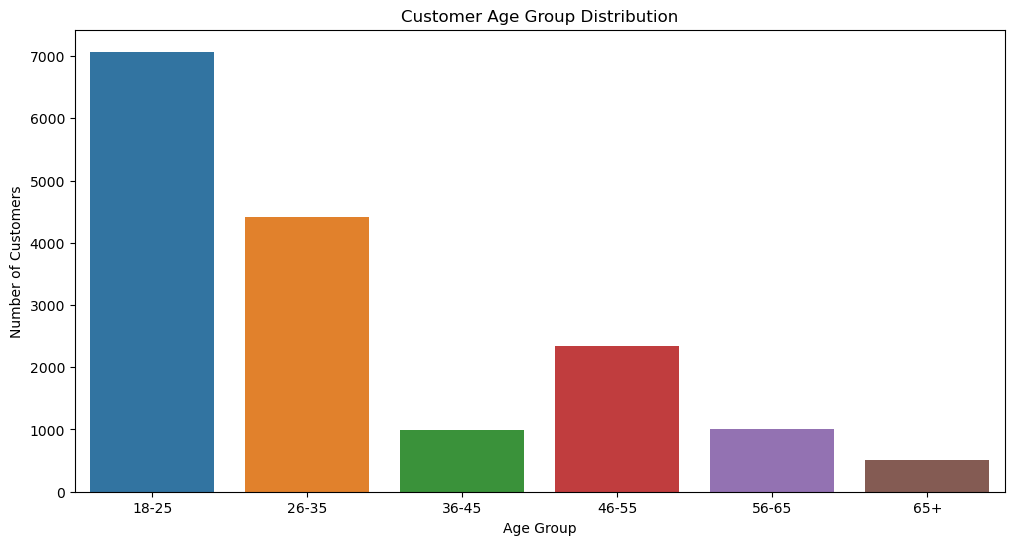

In [77]:
#Feature Creation: 1 Age Group

# Step 1: Define age groups
def age_group(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 56 <= age <= 65:
        return '56-65'
    else:
        return '65+'

clothing_df['Age_Group'] = clothing_df['Age'].apply(age_group)

age_distribution = clothing_df['Age_Group'].value_counts().sort_index()

# Print the distribution
print("Age Group Distribution:")
print(age_distribution)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values)
plt.title('Customer Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

#need to add a third dimension - so income? or total_purchase or total_amount

In [78]:
# Step 1: Create an explicit copy
clothing_df_copy = clothing_df.copy()

# Define the function to get generation
def get_generation(age):
    current_year = pd.Timestamp.now().year
    birth_year = current_year - age
    
    if 2010 <= birth_year:
        return 'Generation Alpha'
    elif 1997 <= birth_year <= 2009:
        return 'Gen Z'
    elif 1981 <= birth_year <= 1996:
        return 'Millennial'
    elif 1965 <= birth_year <= 1980:
        return 'Gen X'
    elif 1946 <= birth_year <= 1964:
        return 'Boomer'
    elif 1928 <= birth_year <= 1945:
        return 'Silent Generation'
    else:
        return 'Greatest Generation'

# Step 2: Add the 'Generation' column to the copy
clothing_df_copy['Generation'] = clothing_df_copy['Age'].apply(get_generation)
clothing_df = clothing_df_copy


# Display the updated DataFrame
print(clothing_df[['Age', 'Generation']].sample(10))


generation_distribution = clothing_df['Generation'].value_counts()
print("Generation Distribution:")
print(generation_distribution)

       Age  Generation
77642   26       Gen Z
78587   65      Boomer
69891   44       Gen X
53871   23       Gen Z
38109   46       Gen X
70551   38  Millennial
6218    22       Gen Z
65335   23       Gen Z
94182   18       Gen Z
63804   23       Gen Z
Generation Distribution:
Gen Z         9236
Millennial    3080
Gen X         2905
Boomer        1100
Name: Generation, dtype: int64


In [79]:
#can be shown in Tableau!
#Analyzing Spending patternsof each generation by Recency, Frequency and Monetary Scores 
clothing_df.groupby(['Generation'])['Monetary_Score'].value_counts()

clothing_df.groupby(['Generation'])['Recency_Score'].value_counts()

clothing_df.groupby(['Generation'])['Frequency_Score'].value_counts().sort_values()

Generation  Frequency_Score
Boomer      1                   114
            3                   194
            5                   201
            2                   254
Gen X       1                   282
Millennial  1                   316
Boomer      4                   337
Gen X       5                   571
Millennial  3                   584
Gen X       3                   607
            2                   634
Millennial  5                   649
            2                   663
Gen X       4                   811
Millennial  4                   868
Gen Z       1                   984
            5                  1696
            2                  2004
            3                  2035
            4                  2517
Name: Frequency_Score, dtype: int64

In [82]:
clothing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16321 entries, 2 to 95199
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       16321 non-null  int64  
 1   Transaction_ID    16321 non-null  int64  
 2   Product_Brand     16321 non-null  object 
 3   Age               16321 non-null  int64  
 4   Gender            16321 non-null  object 
 5   Income            16321 non-null  object 
 6   Product_Category  16321 non-null  object 
 7   Product_Type      16321 non-null  object 
 8   products          16321 non-null  object 
 9   Total_Spending    16321 non-null  float64
 10  Monetary_Score    16321 non-null  int64  
 11  Frequency_Score   16321 non-null  int64  
 12  Recency_Score     16321 non-null  int64  
 13  Age_Group         16321 non-null  object 
 14  Generation        16321 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 2.0+ MB


Segmentation variables may include demographics (age, gender, income), psychographics (lifestyle, interests, values), behavioral (purchase frequency, recency, average order value), and geographic location.

In [90]:
clothing_df.head()

,Customer_ID,Transaction_ID,Product_Brand,Age,Gender,Income,Product_Category,Product_Type,products,Total_Spending,Monetary_Score,Frequency_Score,Recency_Score,Age_Group,Generation
2,41633,3615044,Nike,19,Female,Medium,Clothing,Shoes,Sneakers,494.75,2,4,4,18-25,Gen Z
4,51093,4136859,Nike,19,Male,Medium,Clothing,Shoes,Loafers,170.08,2,4,3,18-25,Gen Z
6,39921,7881792,Zara,19,Female,Medium,Clothing,Dress,Fit and flare dress,152.62,2,4,2,18-25,Gen Z
16,28888,8538339,Zara,19,Female,Medium,Clothing,Dress,Cocktail dress,815.91,3,5,5,18-25,Gen Z
36,59523,6138057,Zara,19,Female,Medium,Clothing,Dress,Fit and flare dress,828.35,3,3,2,18-25,Gen Z


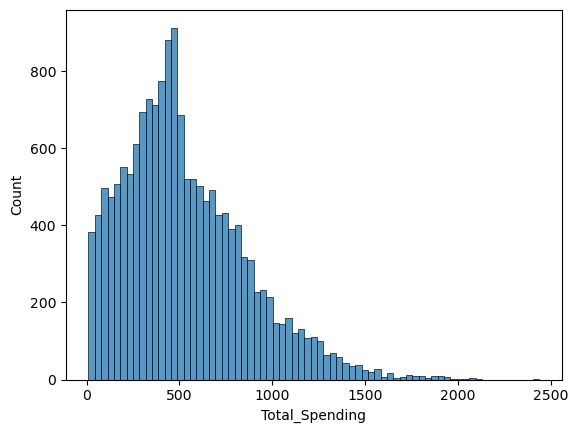

In [83]:
sns.histplot(clothing_df['Total_Spending'])
plt.show()



We will try cleaning the dataframe and preparing it to answer questions in sql and then creating dashboards in Tableau!

For questions in SQL

1. high_frequency_customer = rfm_df[rfm_df['Frequency'] == 56]

high_frequency_customer - this can be used in analysis!

2. rfm_df.Monetary.min() : how much people are spending on these items (distribution)

#16833.18 - max
#10.3 - min

def monetary_range(value):
    if value < 100:
        return "Very Low (< 100)"
    elif value < 500:
        return "Low (100 - 499)"
    elif value < 1000:
        return "Medium (500 - 999)"
    elif value < 5000:
        return "High (1000 - 4999)"
    else:
        return "Very High (5000+)"

#Create a new DataFrame with only CustomerID and Monetary
monetary_df = rfm_df[['Customer_ID', 'Monetary']].copy()

#Add the Monetary Range column
monetary_df['Monetary_Range'] = monetary_df['Monetary'].apply(monetary_range)

#Display the first few rows of the new DataFrame
print(monetary_df.head())

#Display the distribution of Monetary ranges
print("\nDistribution of Monetary Ranges:")
print(monetary_df['Monetary_Range'].value_counts().sort_index())

#Optional: Calculate percentage distribution
percentage_distribution = monetary_df['Monetary_Range'].value_counts(normalize=True).sort_index() * 100
print("\nPercentage Distribution:")
print(percentage_distribution)